In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
gazp = pd.read_csv('/content/GAZP_101001_171001.txt')
mvid = pd.read_csv('/content/MVID_101001_171001.txt')

In [ ]:
gazp.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,GAZP,D,20101001,0,160.54,60923751
1,GAZP,D,20101004,0,161.99,61902787
2,GAZP,D,20101005,0,162.44,61546943
3,GAZP,D,20101006,0,163.00,67921495
4,GAZP,D,20101007,0,162.49,43529081


In [ ]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [ ]:
gazp.size, mvid.size

(10548, 10548)

In [ ]:
res = pd.merge(gazp, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,GAZP,D,20101001,0,160.54,60923751,MVID,D,0,194.38,19406
1,GAZP,D,20101004,0,161.99,61902787,MVID,D,0,190.00,31039
2,GAZP,D,20101005,0,162.44,61546943,MVID,D,0,187.00,17651
3,GAZP,D,20101006,0,163.00,67921495,MVID,D,0,190.04,36482
4,GAZP,D,20101007,0,162.49,43529081,MVID,D,0,199.85,204248


In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

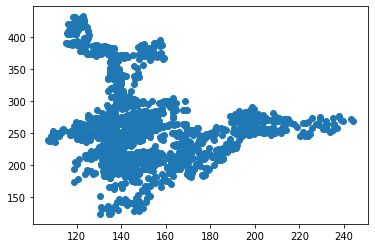

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class hypothesis(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step <= max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = abs(old_err - new_err) 
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


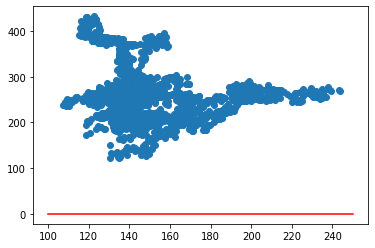

In [ ]:
X0 = np.linspace(100, 250, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 3377.6761158068834


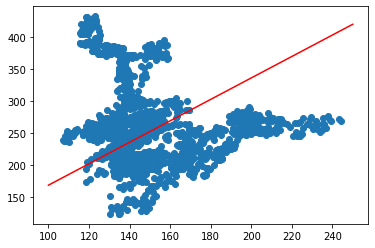

In [ ]:
X0 = np.linspace(100, 250, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

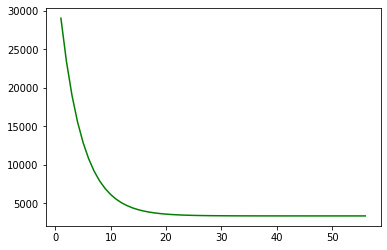

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
def adapt_learning_rate(epoch):
    return 0.001 * epoch

In [ ]:
import keras

In [ ]:
my_lr_scheduler = keras.callbacks.LearningRateScheduler(adapt_learning_rate)

In [ ]:
hyp.fit(x, y, callbacks=[my_lr_scheduler])

AttributeError: ignored

№2.2

In [ ]:
rosn = pd.read_csv('/content/ROSN_170101_220701.txt', sep=';')
sngs = pd.read_csv('/content/MOEX.SNGS_SMAL_170101_220701.txt', sep=';')
rosn

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ROSN,D,20170103,0,403.60,425.70,403.60,419.50,5.895.780
1,ROSN,D,20170104,0,418.95,420.00,403.70,406.40,4.154.670
2,ROSN,D,20170105,0,407.50,411.50,396.60,399.00,4.826.110
3,ROSN,D,20170106,0,399.20,399.75,390.15,392.50,3.659.190
4,ROSN,D,20170109,0,393.05,395.95,390.25,394.00,4.477.860
...,...,...,...,...,...,...,...,...,...
1363,ROSN,D,20220627,0,377.00,378.75,372.60,376.65,1.274.645
1364,ROSN,D,20220628,0,377.10,385.20,373.55,381.85,2.959.978
1365,ROSN,D,20220629,0,381.95,386.50,374.25,384.20,2.922.665
1366,ROSN,D,20220630,0,386.10,387.35,348.05,362.25,9.739.420


In [ ]:
res = pd.merge(rosn, sngs, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<OPEN>_x,<HIGH>_x,<LOW>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<OPEN>_y,<HIGH>_y,<LOW>_y,<CLOSE>_y,<VOL>_y
0,ROSN,D,20170103,0,403.60,425.70,403.60,419.5,5.895.780,MOEX.SNGS:SMAL,D,0,31.355,31.925,31.355,31.925,130.0
1,ROSN,D,20170104,0,418.95,420.00,403.70,406.4,4.154.670,MOEX.SNGS:SMAL,D,0,31.535,31.535,31.530,31.530,36.0
2,ROSN,D,20170105,0,407.50,411.50,396.60,399.0,4.826.110,MOEX.SNGS:SMAL,D,0,31.495,31.495,31.495,31.495,40.0
3,ROSN,D,20170106,0,399.20,399.75,390.15,392.5,3.659.190,MOEX.SNGS:SMAL,D,0,31.690,31.690,31.205,31.205,178.0
4,ROSN,D,20170110,0,392.80,405.75,392.10,404.4,3.733.170,MOEX.SNGS:SMAL,D,0,31.095,31.425,31.095,31.425,38.0


In [ ]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

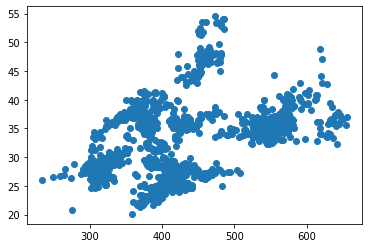

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 546.2582242945155


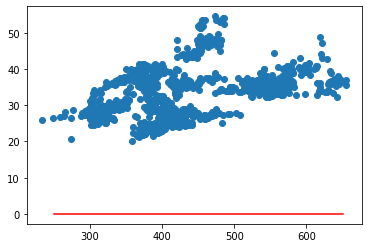

In [ ]:
X0 = np.linspace(250, 650, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [ ]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 24.50268368135049


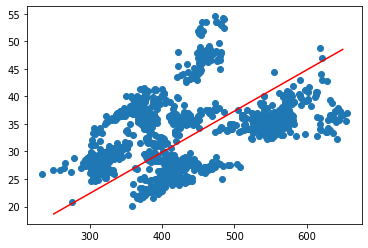

In [ ]:
X0 = np.linspace(250, 650, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

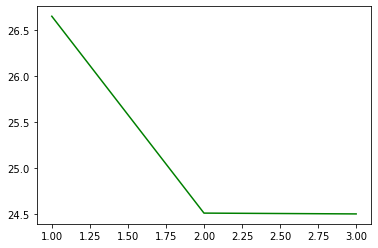

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train = np.array(x).reshape(-1, 1)
Y_train = np.array(y).reshape(-1, 1)

In [ ]:
linr = LinearRegression().fit(X_train, Y_train)
linr.score(X_train, Y_train)

0.1887202664584392

In [ ]:
print(f"b0: {linr.coef_[0][0]}\nb1: {linr.intercept_[0]}")

b0: 0.030939529758857214
b1: 19.337196378428086
